In [2]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


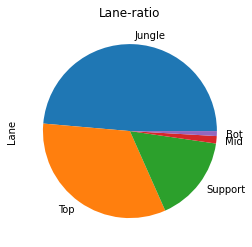

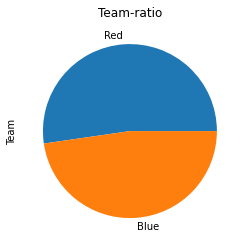

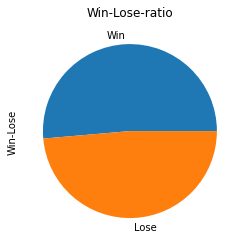

<function matplotlib.pyplot.show>

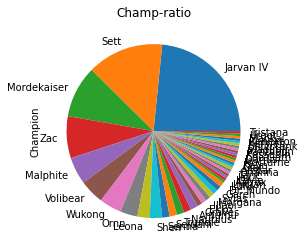

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/LOL_rank.csv')

# 라인별
pd.value_counts(df['Lane']).plot.pie()
plt.title('Lane-ratio')
plt.show()
# 팀별
pd.value_counts(df['Team']).plot.pie()
plt.title("Team-ratio")
plt.show()
# 승패
pd.value_counts(df['Win-Lose']).plot.pie()
plt.title("Win-Lose-ratio")
plt.show()
# 챔피언
pd.value_counts(df['Champion']).plot.pie()
plt.title("Champ-ratio")
plt.show

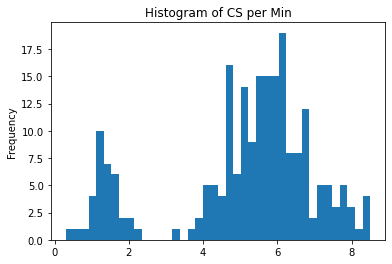

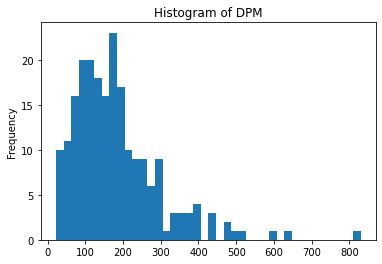

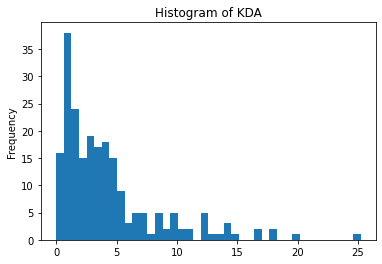

In [ ]:
# Histogram of CS per Min
df['CS per Min'].plot.hist(bins=40)
plt.title("Histogram of CS per Min")
plt.show()
# Histogram of DPM
df['DPM'].plot.hist(bins=40)
plt.title("Histogram of DPM")
plt.show()
# Histogram of KDA
df['KDA'].plot.hist(bins=40)
plt.title("Histogram of KDA")
plt.show()

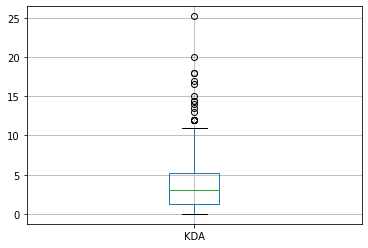

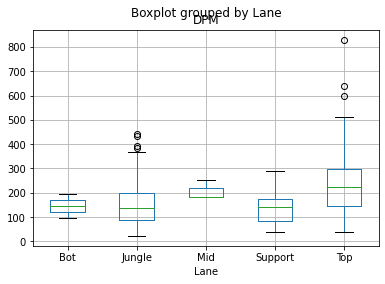

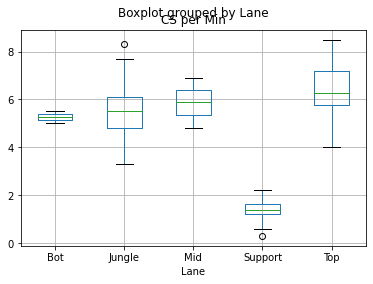

In [7]:
# Box plot of KDA
df.boxplot(column=['KDA'])
plt.show()

# Box plot of DPM by Lane
df.boxplot(column=['DPM'], by='Lane')
plt.show()

# Box plot of CS by Lane
df.boxplot(column=['CS per Min'], by='Lane')
plt.show()


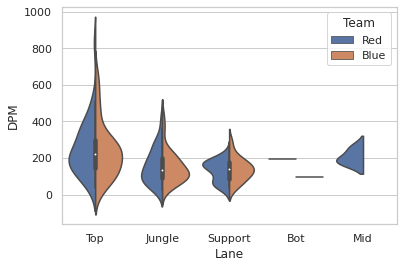

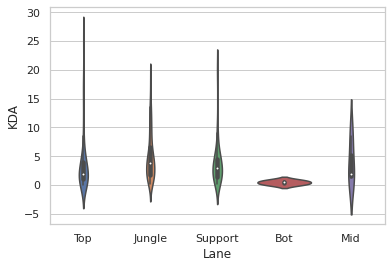

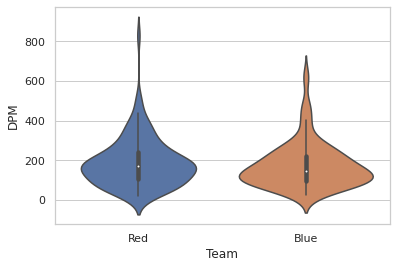

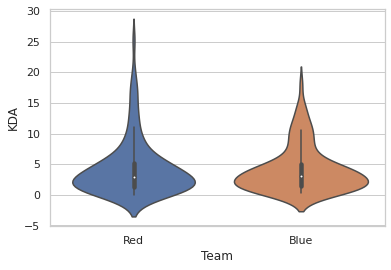

In [ ]:
import seaborn as sns; sns.set(style='whitegrid')
# Violin plot of Lane별 DPM을 Team별로 split
sns.violinplot(data=df, x='Lane', y='DPM', hue='Team', split=True)
plt.show()

# Lane별 KDA Violin plot
sns.violinplot(data=df, x='Lane', y='KDA')
plt.show()
# Team별 KDA Violin plot
sns.violinplot(data=df, x='Team', y='KDA')
plt.show()

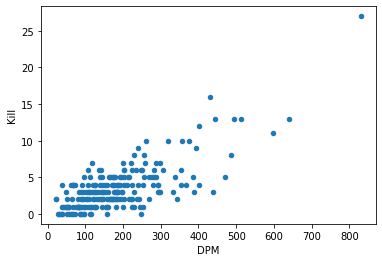

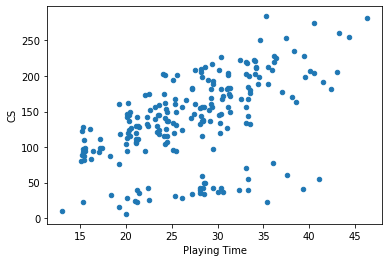

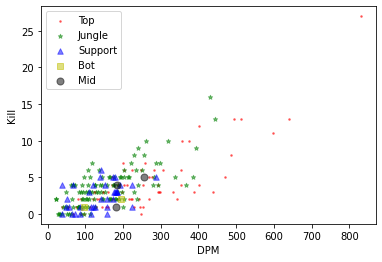

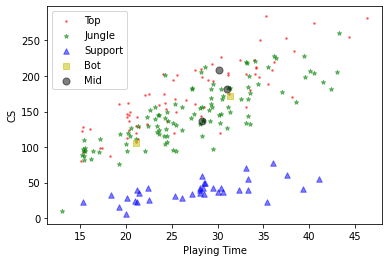

In [8]:
# Scatter plot
# plot Kill vs. DPM
df.plot.scatter(x='DPM', y='Kill')
plt.show()
# plot CS vs. Playing Time
df.plot.scatter(x='Playing Time', y='CS')
plt.show()

# DPM과 Kill을 Lane 클래스 별로 구별
colors = ['r','g','b','y','black']
markers = ['.', '*', '^', ',', 'o']
fig, ax = plt.subplots(1,1)
for i, lanes in enumerate(df['Lane'].unique()):
  i = i % 5
  ddf = df[df['Lane']==lanes]
  ddf.plot.scatter(x='DPM', y='Kill',
                   alpha=0.5, s=10*(i+1), ax=ax, 
                   color=colors[i], marker=markers[i], label=lanes)
plt.legend()
plt.show()

# Playing Time과 CS를 Lane 클래스 별로 구별
colors = ['r','g','b','y','black']
markers = ['.', '*', '^', ',', 'o']
fig, ax = plt.subplots(1,1)
for i, lanes in enumerate(df['Lane'].unique()):
  i = i % 5
  ddf = df[df['Lane']==lanes]
  ddf.plot.scatter(x='Playing Time', y='CS',
                   alpha=0.5, s=10*(i+1), ax=ax, 
                   color=colors[i], marker=markers[i], label=lanes)
plt.legend()
plt.show()

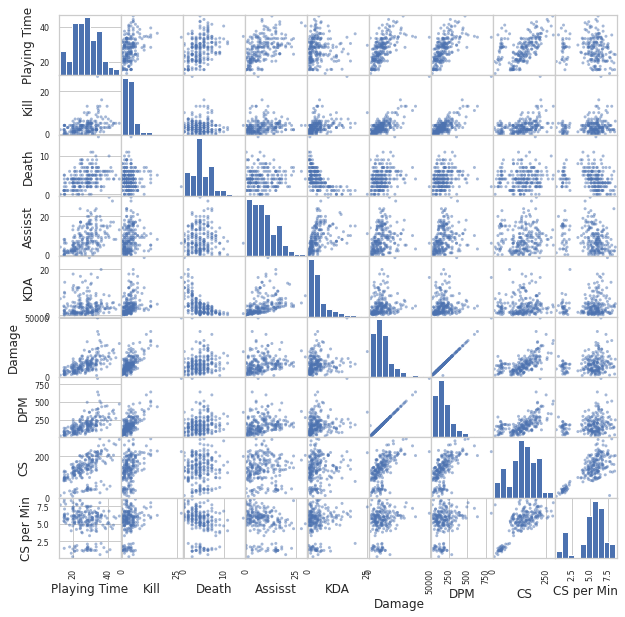

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,10))
plt.show()

In [14]:
print('평균')
m = df.mean()
print(m)
print('\nJarvan IV 챔피온의 평균')
m_a = df[df['Champion']=='Jarvan IV'].mean()
print(m_a)
print('\n상관계수')
df.corr()

평균
Playing Time       27.212477
Kill                3.541284
Death               4.087156
Assisst             8.233945
KDA                 4.242339
Damage          10898.784404
DPM               182.340367
CS                137.990826
CS per Min          5.145413
dtype: float64

Jarvan IV 챔피온의 평균
Playing Time      26.564510
Kill               3.039216
Death              4.235294
Assisst           11.156863
KDA                4.237255
Damage          7614.098039
DPM              129.849020
CS               137.372549
CS per Min         5.331373
dtype: float64

상관계수


,Playing Time,Kill,Death,Assisst,KDA,Damage,DPM,CS,CS per Min
Playing Time,1.000000,0.356721,0.396674,0.511244,0.044792,0.626906,0.634987,0.510471,-0.126856
Kill,0.356721,1.000000,-0.055474,0.129883,0.390446,0.748110,0.748610,0.402494,0.186405
Death,0.396674,-0.055474,1.000000,0.049614,-0.598714,0.193801,0.206383,0.082175,-0.217626
Assisst,0.511244,0.129883,0.049614,1.000000,0.409304,0.220496,0.226917,0.054545,-0.261644
KDA,0.044792,0.390446,-0.598714,0.409304,1.000000,0.182790,0.180128,0.110310,0.130999
Damage,0.626906,0.748110,0.193801,0.220496,0.182790,1.000000,0.996329,0.607013,0.222816
DPM,0.634987,0.748610,0.206383,0.226917,0.180128,0.996329,1.000000,0.609129,0.220005
CS,0.510471,0.402494,0.082175,0.054545,0.110310,0.607013,0.609129,1.000000,0.754036
CS per Min,-0.126856,0.186405,-0.217626,-0.261644,0.130999,0.222816,0.220005,0.754036,1.000000
